IMPORTING REQUIRED LIBRARIES

In [1]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
'''Align Center Plot Outputs in Notebook''' 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    // display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

READING DATA AND PRINTING HEAD AND TAIL OF THE DATASET

In [2]:
df = pd.read_csv("/Users/krishna/Desktop/GITHUB/New York Airbnb Analysis/Dataset/AB_NYC_2019.csv")

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

This code calculates the number of missing values in each column of a Pandas DataFrame df and sorts them in descending order. The output is a Series object with the count of missing values for each column, from the column with the most missing values to the column with the least missing values.





In [5]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Method allows the user to analyze and drop Rows/Columns with Null values in different ways
REPLACE_NAME_VALUE = "$"
REPLACE_HOST_NAME_VALUE = "#"

# Fill NA/NaN values using the specified method.
df['name'].fillna(REPLACE_NAME_VALUE, inplace=True)           
df['host_name'].fillna(REPLACE_HOST_NAME_VALUE, inplace=True)

In [7]:
print("Length of Airbnb DataFrame that match with Name = \"{}\": {}".format(REPLACE_NAME_VALUE, len(df[df.name == REPLACE_NAME_VALUE])))
print("Length of Airbnb DataFrame that match with Host_Name = \"{}\": {}".format(REPLACE_HOST_NAME_VALUE, len(df[df.host_name == REPLACE_HOST_NAME_VALUE])))

Length of Airbnb DataFrame that match with Name = "$": 16
Length of Airbnb DataFrame that match with Host_Name = "#": 21


In [8]:
'''Show the first 5 rows in airbnb dataset'''
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [9]:
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [10]:
len(df.index)

48895

In [11]:
df.shape

(48895, 16)

In [12]:
timeit df.shape

463 ns ± 6.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
df.loc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [14]:
# NYC_dataset.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This code generates descriptive statistics of a Pandas DataFrame df. The output includes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numerical column in the DataFrame

In [15]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

NOW, WE ARE GOING TO ANSWER RESEARCH QUESTIONS

RESEARCH QUESTION 1 :- What are the popular neighbourhoods and property types in the New York, what are the average price per night?

In [16]:
# get the most popular neighborhoods
popular_neighborhoods = df.neighbourhood.value_counts().head(10)

# get the most popular property types
popular_property_types = df.room_type.value_counts()


# print the results
print('Most popular neighborhoods:\n', popular_neighborhoods)
print()
print('Most popular property types:\n', popular_property_types)

Most popular neighborhoods:
 Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Most popular property types:
 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


prints out the most popular neighborhoods and property types in New York.

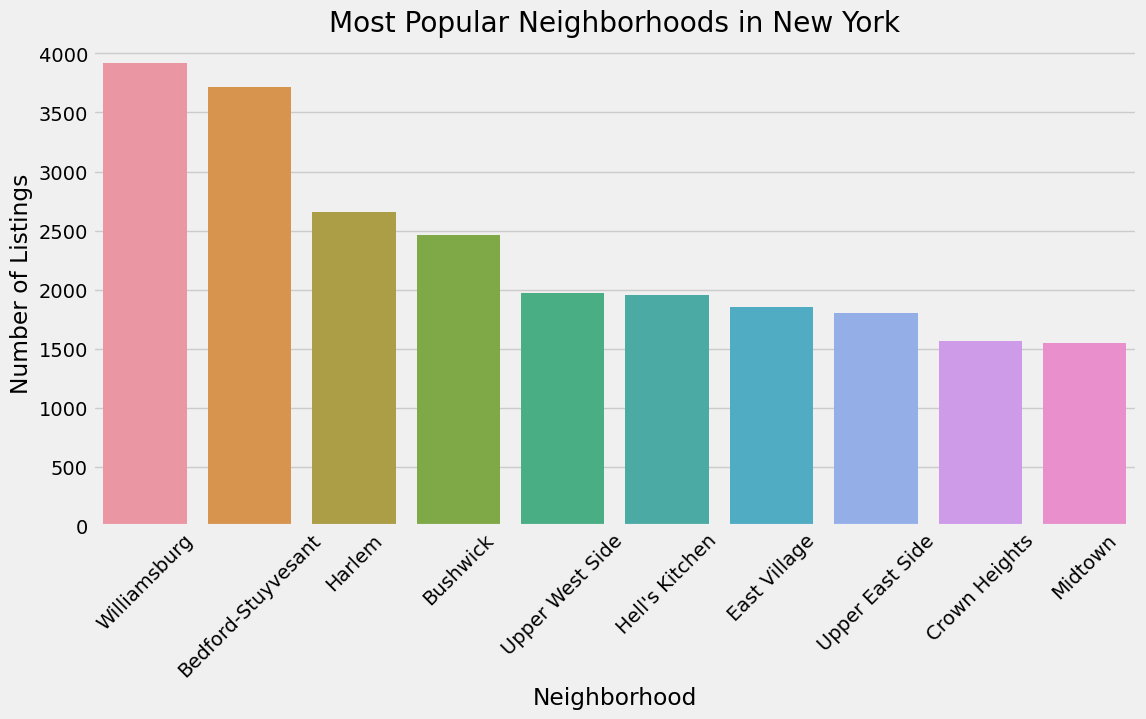

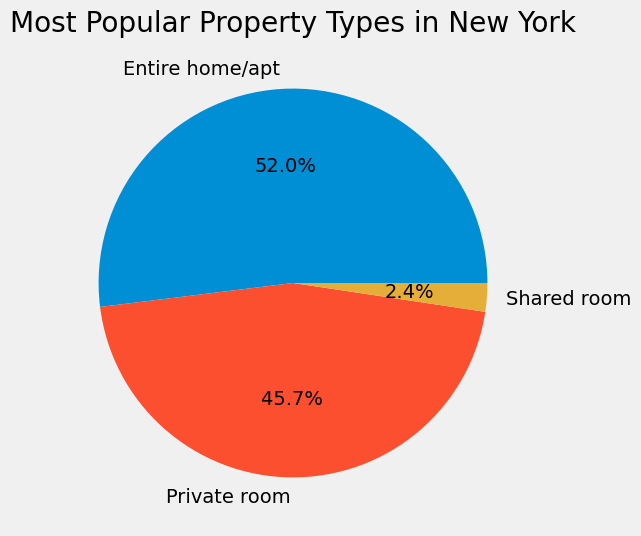

In [17]:
# create a bar plot of the most popular neighborhoods
plt.figure(figsize=(12,6))
sns.barplot(x=popular_neighborhoods.index, y=popular_neighborhoods.values)
plt.title('Most Popular Neighborhoods in New York')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# create a pie chart of the most popular property types
plt.figure(figsize=(6,6))
plt.pie(popular_property_types.values, labels=popular_property_types.index, autopct='%1.1f%%')
plt.title('Most Popular Property Types in New York')
plt.show()

In [18]:
# define the popular neighborhoods and room types
popular_neighborhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side']
popular_room_types = ['Entire home/apt', 'Private room']

# filter the data by popular neighborhoods and room types, group by neighborhood and property type, and calculate the average nightly rate
grouped_df = df[(df['neighbourhood'].isin(popular_neighborhoods)) & (df['room_type'].isin(popular_room_types))] \
                .groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# display the average nightly rates for popular neighborhoods and room types
for index, row in grouped_df.iterrows():
    neighborhood = row['neighbourhood']
    property_type = row['room_type']
    avg_price = row['price']
    print(f"For hosts in {property_type} listings in {neighborhood}, we recommend setting the price at ${avg_price:.2f} per night.")


For hosts in Entire home/apt listings in Bedford-Stuyvesant, we recommend setting the price at $154.78 per night.
For hosts in Private room listings in Bedford-Stuyvesant, we recommend setting the price at $73.30 per night.
For hosts in Entire home/apt listings in Bushwick, we recommend setting the price at $145.78 per night.
For hosts in Private room listings in Bushwick, we recommend setting the price at $62.62 per night.
For hosts in Entire home/apt listings in Harlem, we recommend setting the price at $177.60 per night.
For hosts in Private room listings in Harlem, we recommend setting the price at $81.95 per night.
For hosts in Entire home/apt listings in Upper West Side, we recommend setting the price at $262.05 per night.
For hosts in Private room listings in Upper West Side, we recommend setting the price at $122.64 per night.
For hosts in Entire home/apt listings in Williamsburg, we recommend setting the price at $206.09 per night.
For hosts in Private room listings in William

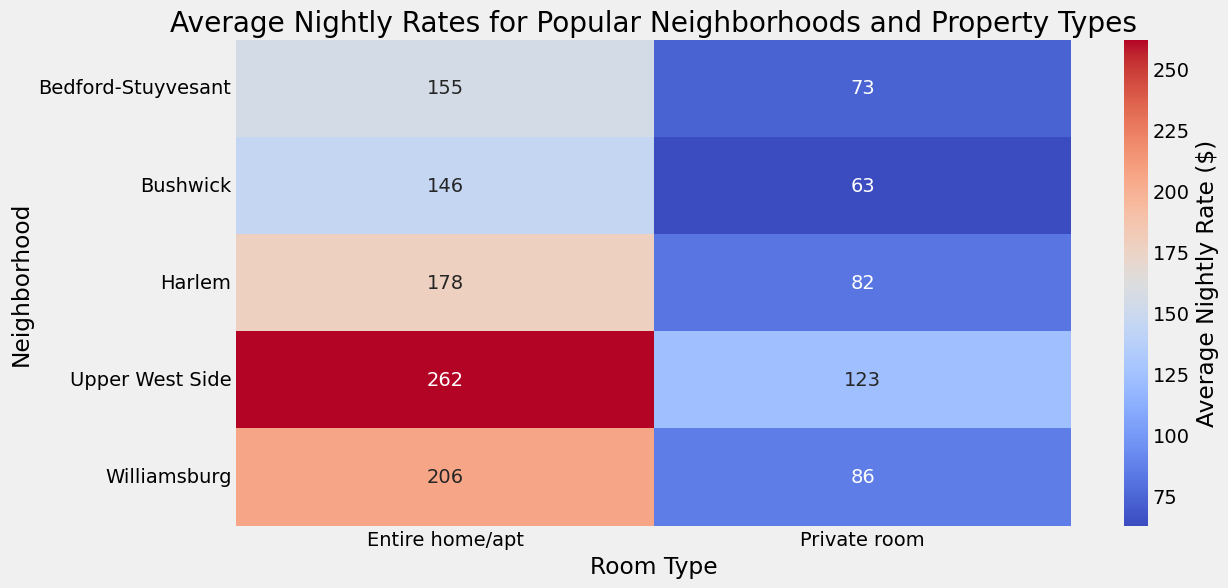

In [19]:
# define the popular neighborhoods and property types
popular_neighborhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side']
popular_property_types = ['Entire home/apt', 'Private room']

# filter the data by popular neighborhoods and property types
filtered_df = df[(df['neighbourhood'].isin(popular_neighborhoods)) & (df['room_type'].isin(popular_property_types))]

# group the filtered data by neighborhood and property type, and calculate the average nightly rate
grouped_df = filtered_df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# create a pivot table for the grouped data
pivot_df = grouped_df.pivot(index='neighbourhood', columns='room_type', values='price')

# create a heatmap plot of the average nightly rates by neighborhood and property type
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Average Nightly Rate ($)'})
plt.title('Average Nightly Rates for Popular Neighborhoods and Property Types')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.show()

RESEARCH QUESTION 2 :- What information can we draw from the metrics, such as places, costs, and customer feedback?


In [20]:
# compute some basic descriptive statistics for the price and neighbourhood columns
print('Descriptive statistics for price:')
print(df['price'].describe())
print('')

print('Number of listings per neighbourhood:')
print(df['neighbourhood'].value_counts())
print('')



Descriptive statistics for price:
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Number of listings per neighbourhood:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64



In [21]:
# compute the number of listings per neighbourhood
neighborhood_counts = df['neighbourhood'].value_counts().reset_index()

# create an interactive bar chart to visualize the distribution of listings across different neighborhoods
fig = px.bar(neighborhood_counts, x='index', y='neighbourhood', labels={'index': 'Neighborhood', 'neighbourhood': 'Number of Listings'},
             title='Distribution of Airbnb Listings Across Neighborhoods')
fig.update_layout(xaxis_tickangle=-90)
fig.show()

In [42]:
# create a box plot to visualize the relationship between neighborhood and price
fig2 = px.box(df, x='neighbourhood', y='price', points='all')
fig2.update_layout(title='Relationship Between Neighborhood and Price', xaxis_title='Neighborhood', yaxis_title='Price')
fig2.show()





The histogram shows the distribution of listing prices, while the box plot shows how prices vary across different neighborhoods. These visualizations can provide insights into the range of prices and how they are distributed across the datase

In [23]:
# create a correlation matrix heatmap
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu')
fig.update_layout(title='Correlation Matrix')
fig.show()

# create a scatter plot to visualize the relationship between price and number of reviews
fig = px.scatter(df, x='price', y='number_of_reviews', trendline='ols')
fig.update_layout(title='Relationship Between Price and Number of Reviews')
fig.update_xaxes(title='Price')
fig.update_yaxes(title='Number of Reviews')
fig.show()

The correlation matrix shows the pairwise correlations between numerical variables in the dataset, while the scatter plot shows the relationship between price and the number of reviews. These visualizations can help identify relationships and patterns in the data that can inform assumptions and hypotheses.

Overall, by applying descriptive statistics and data visualization techniques to the metrics in the dataset, we can draw assumptions about the relationships between variables such as places, costs, and customer feedback. These assumptions can then be used to guide further analysis and modeling of the data.

RESEARCH QUESTION 3 :- Can we predict the prices using Machine Learning techniques(Gradient Boosted Regressor Model & Linear Regression Model) ?


MACHINE LEARNING PREDICTIONS

We'll be focusing on Price Predictions in order to dive into possible future prices based on real Airbnb's price data. Using Machine Learning techniques and with the power of Linear Regression Models & Decisions Tree algorithms between others. Also, introduce of latest ML Python packages to work with like Scikit Learn, Tensorflow...

Preprocessing and preparing Data for Prediction

In [26]:
df2 = pd.read_csv("/Users/krishna/Desktop/GITHUB/New York Airbnb Analysis/Dataset/AB_NYC_2019.csv")
df2.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
df2['reviews_per_month']=df2['reviews_per_month'].replace(np.nan, 0)

In [27]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(df2['neighbourhood_group'])
df2['neighbourhood_group']=le.transform(df2['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(df2['neighbourhood'])
df2['neighbourhood']=le.transform(df2['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df2['room_type'])
df2['room_type']=le.transform(df2['room_type'])

df2.sort_values(by='price',ascending=True,inplace=True)
df2.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

In [28]:
'''Reversing Labeling Transform'''
list(le.inverse_transform(df2['room_type']))[:10]

['Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Shared room']

MODELLING

LINEAR REGRESSION MODEL

In [29]:
'''Train LRM'''
lm = LinearRegression()

X = df2[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [30]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.7340965693625
        R2 Score: 11.639576782323669
        Mean Absolute Error: 72.86091366825575
     


GRADIENT BOOSTED REGRESSOR MODEL

Gradient Boosted (GB) builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [31]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [32]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.40086990141288
        R2 Score: 16.777436715679283
        Mean Absolute Error: 63.94646375198476
     


RESULTS

PREDICTIONS(LINEAR REGRESSION MODEL)

ACTUAL VALUES VS PREDICTED VALUES

In [33]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753

In [34]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

LINEAR MODEL PREDICTIONS

/Users/krishna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



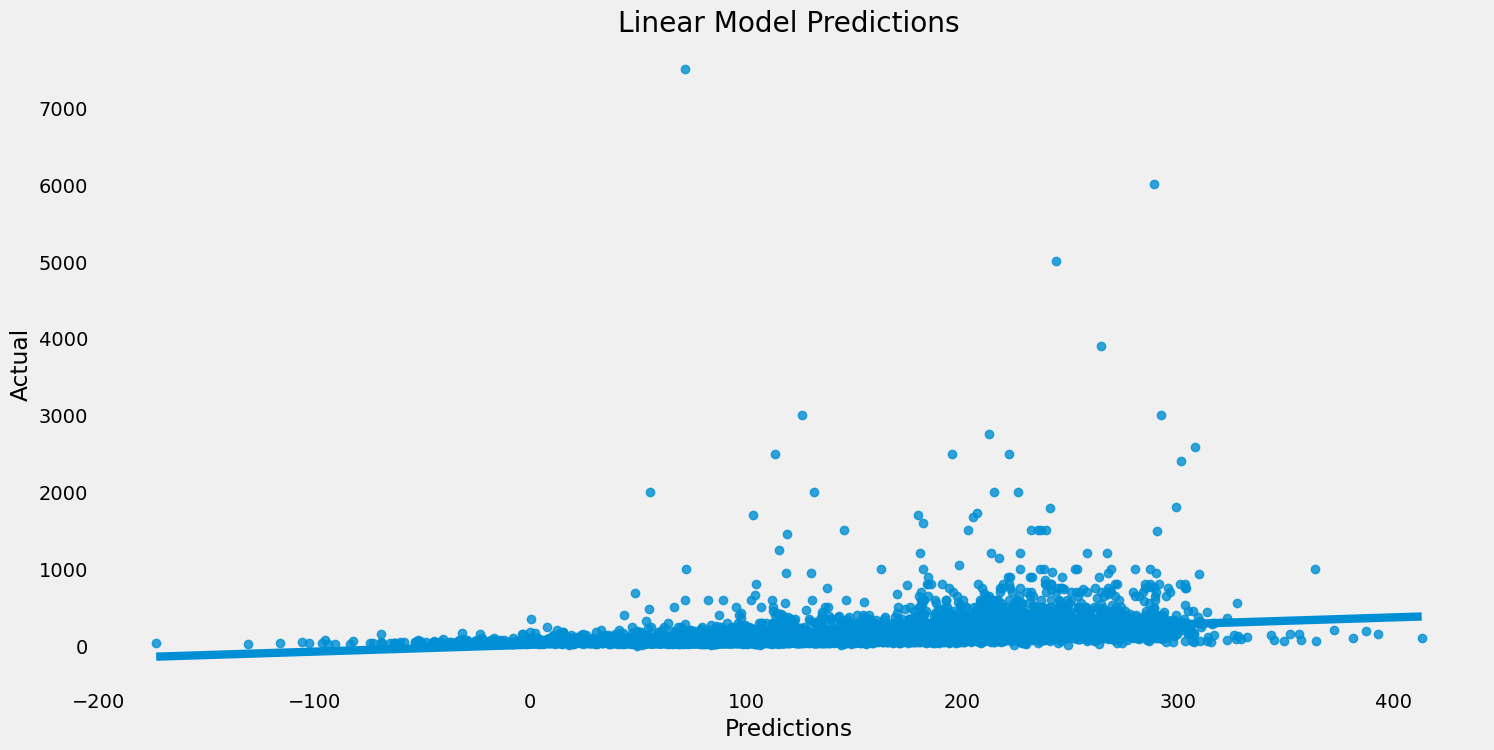

In [35]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

PREDICTIONS 2(GRADIENT BOOSTED REGRESSOR MODEL)

ACTUAL VALUES VS PREDICTED VALUES

In [36]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0            400        125.903567
1            140        156.575618
2            195        161.337522
3            120         94.543442
4             88         71.978409

In [37]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

GRADIENT BOOSTED REGREESOR MODEL PREDICTIONS

/Users/krishna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



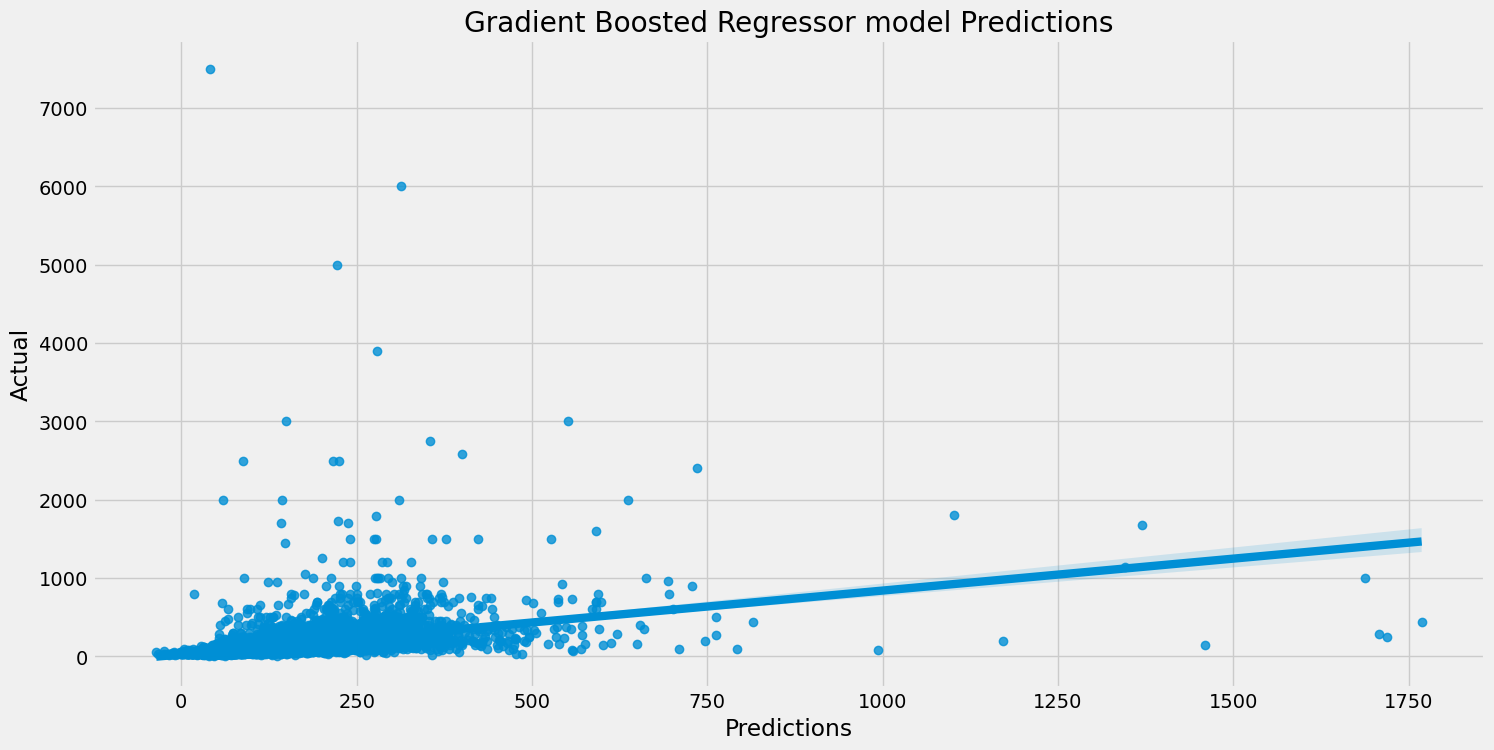

In [38]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()


We got into Predictive Analysis using the latest stack technology in order to predict the price of Airbnb's over the year. We have used Machine Learning as application of Artificial Intelligence (AI), and we also applied the most optimized algorithms like: "Linear Regression Model" & "Gradient Boosted Regressor Model" where we got a positive results coming up with the GENERALIZED INCREASE IN PRICES IN NEW YORK CITY.